# Introduction

The decisions made by the Supreme Court have far-reaching, often long-lasting, effects on life in America. While the rulings themselves often get the most attention through media coverage and analysis, the written opinions of the Supreme Court justices have a very important impact through the legal precedent and reasoning that they set for courts across America to be used in the future. As such, more should be done to study what is in these written opinions.

I will seek to shine a light on these opinions by analyzing the impact that authorship has on the opinions. When a specific Supreme Court Justice writes an opinion, how does it change that opinion? Which justices are more like each other? What subjects does a justice write on most? I will seek to answer these and other questions along the way.

The dataset was curated by Garrett Fidler through public websites that give access to all Supreme Court opinions. The opinions I will be analyzing are from the year 1970 to the present.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import nltk
import re
import spacy
import warnings


warnings.filterwarnings('ignore')

In [2]:
path = 'C:\\Users\Ross Last\\Python files\\Unit 4 Unsupervised Learning\\scotus-opinions\\opinions_since_1970.csv'
df = pd.read_csv(path)
df.head()

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text
0,justice roberts,majority,False,McCutcheon v. Federal Election Comm'n,2014-04-02,134 S. Ct. 1434,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,There is no right more basic in our democracy ...
1,justice thomas,concurring,False,McCutcheon v. Federal Election Comm'n,2014-04-02,134 S. Ct. 1434,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,I adhere to the view that this Court’s decisio...
2,justice breyer,dissenting,False,McCutcheon v. Federal Election Comm'n,2014-04-02,134 S. Ct. 1434,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,"Nearly 40 years ago in Buckley v. Valeo, 424 U..."
3,justice kagan,majority,False,Kaley v. United States,2014-02-25,NaN,https://www.courtlistener.com/opinion/2654533/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,NaN,NaN,NaN,NaN,"A federal statute, 21 U.S. C. §853(e), authori..."
4,justice roberts,dissenting,False,Kaley v. United States,2014-02-25,NaN,https://www.courtlistener.com/opinion/2654533/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,NaN,NaN,NaN,NaN,An individual facing serious criminal charges ...


In [3]:
df['length'] = np.nan
for i, opinion in enumerate(df['text']):
    df.loc[i, 'length'] = len(opinion)

df.head()

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text,length
0,justice roberts,majority,False,McCutcheon v. Federal Election Comm'n,2014-04-02,134 S. Ct. 1434,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,There is no right more basic in our democracy ...,80851.0
1,justice thomas,concurring,False,McCutcheon v. Federal Election Comm'n,2014-04-02,134 S. Ct. 1434,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,I adhere to the view that this Court’s decisio...,9875.0
2,justice breyer,dissenting,False,McCutcheon v. Federal Election Comm'n,2014-04-02,134 S. Ct. 1434,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,"Nearly 40 years ago in Buckley v. Valeo, 424 U...",61132.0
3,justice kagan,majority,False,Kaley v. United States,2014-02-25,NaN,https://www.courtlistener.com/opinion/2654533/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,NaN,NaN,NaN,NaN,"A federal statute, 21 U.S. C. §853(e), authori...",44457.0
4,justice roberts,dissenting,False,Kaley v. United States,2014-02-25,NaN,https://www.courtlistener.com/opinion/2654533/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,NaN,NaN,NaN,NaN,An individual facing serious criminal charges ...,36936.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10389 entries, 0 to 10388
Data columns (total 15 columns):
author_name                10389 non-null object
category                   10389 non-null object
per_curiam                 10389 non-null bool
case_name                  10389 non-null object
date_filed                 10389 non-null object
federal_cite_one           10387 non-null object
absolute_url               10389 non-null object
cluster                    10389 non-null object
year_filed                 10389 non-null int64
scdb_id                    10295 non-null object
scdb_decision_direction    10295 non-null float64
scdb_votes_majority        10295 non-null float64
scdb_votes_minority        10295 non-null float64
text                       10389 non-null object
length                     10389 non-null float64
dtypes: bool(1), float64(4), int64(1), object(9)
memory usage: 1.1+ MB


In [5]:
# Drop cases with unknown decision direction and vote counts
df = df.dropna()
# Reset index after dropping rows
df = df.reset_index(drop=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10295 entries, 0 to 10294
Data columns (total 15 columns):
author_name                10295 non-null object
category                   10295 non-null object
per_curiam                 10295 non-null bool
case_name                  10295 non-null object
date_filed                 10295 non-null object
federal_cite_one           10295 non-null object
absolute_url               10295 non-null object
cluster                    10295 non-null object
year_filed                 10295 non-null int64
scdb_id                    10295 non-null object
scdb_decision_direction    10295 non-null float64
scdb_votes_majority        10295 non-null float64
scdb_votes_minority        10295 non-null float64
text                       10295 non-null object
length                     10295 non-null float64
dtypes: bool(1), float64(4), int64(1), object(9)
memory usage: 1.1+ MB


In [7]:
df.per_curiam.value_counts()

False    9187
True     1108
Name: per_curiam, dtype: int64

In [8]:
# Per curiam refers to opinions that are unanimous and are written collectively.
# Drop opinions that are per curiam as we are interested in analyzing specific authors.
df = df[df.per_curiam == False]

In [9]:
df.per_curiam.value_counts()

False    9187
Name: per_curiam, dtype: int64

In [10]:
df.author_name.value_counts()

justice stevens                          1070
justice rehnquist                         715
justice brennan                           688
justice scalia                            660
justice white                             639
justice blackmun                          624
justice marshall                          564
justice o'connor                          510
justice thomas                            444
justice powell                            442
justice kennedy                           414
justice burger                            399
justice breyer                            339
justice ginsburg                          335
justice stewart                           315
justice souter                            283
justice douglas                           243
justice alito                             162
justice sotomayor                         106
justice roberts                            74
justice kagan                              60
justice black                     

In [11]:
# Drop justices without significant number of opinions
least_justices = ['justice o2122', 'justice connor', 'justice fuller', 
                  'justice gorsuch', 'justice black;', 'justice bruger',
                  'justice [[author]]ginsburg[[/author]]']
for justice in least_justices:
    df = df[df.author_name != justice]

df.author_name.value_counts()

justice stevens      1070
justice rehnquist     715
justice brennan       688
justice scalia        660
justice white         639
justice blackmun      624
justice marshall      564
justice o'connor      510
justice thomas        444
justice powell        442
justice kennedy       414
justice burger        399
justice breyer        339
justice ginsburg      335
justice stewart       315
justice souter        283
justice douglas       243
justice alito         162
justice sotomayor     106
justice roberts        74
justice kagan          60
justice black          51
justice harlan         42
Name: author_name, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9179 entries, 0 to 10294
Data columns (total 15 columns):
author_name                9179 non-null object
category                   9179 non-null object
per_curiam                 9179 non-null bool
case_name                  9179 non-null object
date_filed                 9179 non-null object
federal_cite_one           9179 non-null object
absolute_url               9179 non-null object
cluster                    9179 non-null object
year_filed                 9179 non-null int64
scdb_id                    9179 non-null object
scdb_decision_direction    9179 non-null float64
scdb_votes_majority        9179 non-null float64
scdb_votes_minority        9179 non-null float64
text                       9179 non-null object
length                     9179 non-null float64
dtypes: bool(1), float64(4), int64(1), object(9)
memory usage: 1.1+ MB


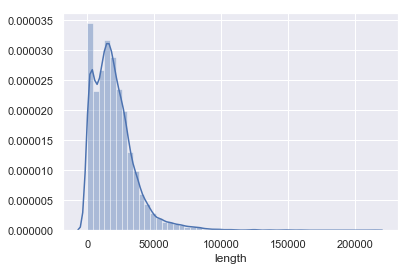

In [13]:
sns.distplot(df.length)

In [14]:
df.length.describe()

count      9179.000000
mean      19965.471838
std       16177.394977
min          91.000000
25%        8751.500000
50%       17232.000000
75%       27030.500000
max      213084.000000
Name: length, dtype: float64

According to the creator of this dataset, a number of the opinions are mini-opinions, acting as addendums to the majority opinion of a case. The spike that is close to 0 in the distribution plot of opinion length represents these opinions. As I am attempting to study the main opinions, I will remove these opinions.

I am also going to remove opinions that are more than 100,000 words in length to 

In [15]:
df = df[df['length'] > 3000]
df = df[df['length'] < 100000]
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8138 entries, 0 to 8137
Data columns (total 15 columns):
author_name                8138 non-null object
category                   8138 non-null object
per_curiam                 8138 non-null bool
case_name                  8138 non-null object
date_filed                 8138 non-null object
federal_cite_one           8138 non-null object
absolute_url               8138 non-null object
cluster                    8138 non-null object
year_filed                 8138 non-null int64
scdb_id                    8138 non-null object
scdb_decision_direction    8138 non-null float64
scdb_votes_majority        8138 non-null float64
scdb_votes_minority        8138 non-null float64
text                       8138 non-null object
length                     8138 non-null float64
dtypes: bool(1), float64(4), int64(1), object(9)
memory usage: 898.1+ KB


# Visualizations to understand the dataset

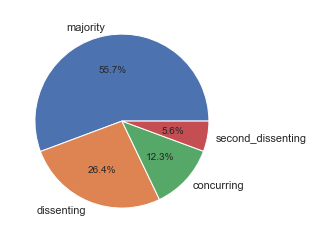

In [16]:
# A breakdown of category distribution
plt.pie(df.category.value_counts(), 
        labels=df.category.value_counts().index.tolist(),
        autopct='%1.1f%%')
plt.show()

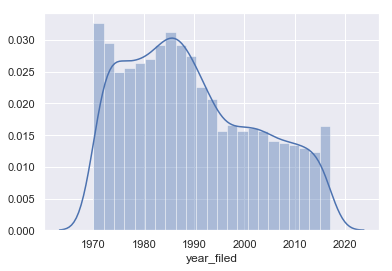

In [17]:
# Year distribution
sns.distplot(df.year_filed)
plt.show()

Every case heard by the court and given a ruling will have a majority opinion written. I will use the majority opinions as a stand-in for the case heard, and break down the share of votes for and against the majority decision for each case.

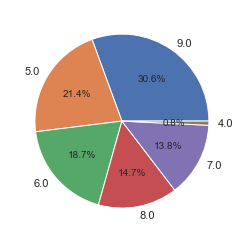

In [18]:
# Breakdown of how many justices vote for majority opinion
plt.pie(df.scdb_votes_majority[df['category'] == 'majority'].value_counts(),
       labels=df.scdb_votes_majority[df['category'] == 'majority'].value_counts().index.tolist(),
       autopct='%1.1f%%')
plt.show()

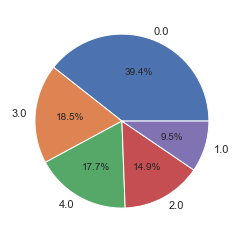

In [19]:
# Breakdown of how many justices vote against majority opinion
plt.pie(df.scdb_votes_minority[df['category'] == 'majority'].value_counts(),
       labels=df.scdb_votes_minority[df['category'] == 'majority'].value_counts().index.tolist(),
       autopct='%1.1f%%')
plt.show()

Nothing too anomolous stands out about the votes for and against majority opinions breakdown. It's time to move into clustering the opinions.

# Clustering

I will be attempting to see if I can create clusters that accurately predict the authorship of opinions using tf-idf created features of the text of the opinions.

In [20]:
'''
Before doing any of the modeling work, I am going to randomly reduce the size of the data
due to local machine memory usage issues. I will use train_test_split to break out a sample
of about 200 opinions to start with, then whittle it down to a sample that has close equal
number of opinions for 10 different authors that I can model with.
'''

from sklearn.model_selection import train_test_split
df_sample, df_split = train_test_split(df, test_size=0.975, random_state=1)

df_sample.author_name.value_counts()

justice stevens      22
justice brennan      17
justice scalia       16
justice powell       16
justice rehnquist    16
justice marshall     13
justice thomas       13
justice white        11
justice blackmun     11
justice kennedy      10
justice breyer        9
justice souter        9
justice douglas       8
justice ginsburg      8
justice o'connor      8
justice stewart       6
justice burger        4
justice alito         2
justice kagan         2
justice roberts       1
justice sotomayor     1
Name: author_name, dtype: int64

In [21]:
# Drop justices to get my desired sample
remove_justices = ['justice stevens', 'justice scalia', 'justice brennan', 
                  'justice rehnquist', 'justice stewart', 'justice burger',
                  'justice kagan', 'justice alito', 'justice sotomayor',
                  'justice roberts', 'justice powell']
for justice in remove_justices:
    df_sample = df_sample[df_sample.author_name != justice]

df_sample.author_name.value_counts()

justice marshall    13
justice thomas      13
justice blackmun    11
justice white       11
justice kennedy     10
justice breyer       9
justice souter       9
justice ginsburg     8
justice douglas      8
justice o'connor     8
Name: author_name, dtype: int64

In [22]:
df_sample = df_sample.reset_index(drop=True)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
author_name                100 non-null object
category                   100 non-null object
per_curiam                 100 non-null bool
case_name                  100 non-null object
date_filed                 100 non-null object
federal_cite_one           100 non-null object
absolute_url               100 non-null object
cluster                    100 non-null object
year_filed                 100 non-null int64
scdb_id                    100 non-null object
scdb_decision_direction    100 non-null float64
scdb_votes_majority        100 non-null float64
scdb_votes_minority        100 non-null float64
text                       100 non-null object
length                     100 non-null float64
dtypes: bool(1), float64(4), int64(1), object(9)
memory usage: 11.1+ KB


## Cleaning, Parsing, and Lemmatizing

In [23]:
parser = spacy.load('en')

# This cleaning function made specifically for the supreme court opinions
# by Garrett Fiddler at https://www.kaggle.com/gqfiddler/preliminary-analysis-and-topic-modeling
def clean(text):
    # recipe from https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string
    rep = {
        '\s+':' ', # reduces any whitespace to a single space
        '\'s':'', # removes possessives, and there are virtually no contractions in the texts
        '’s':'',
        '\r':'',
        'u. s. c.': 'u.s.c.', # federal statute citation
        'u. s.': ''
    }
    rep = dict((re.escape(k), v) for k, v in rep.items())
    pattern = re.compile("|".join(rep.keys()))
    text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text)
    text = re.sub('\s+', ' ', text) # doesn't work in the rep dict for some reason...
    return text


# Clean, parse, lemmatize, and strip out punctuation, stopwords, numbers, and named entities
for i, opinion in enumerate(df_sample['text']):
    opinion = parser(clean(opinion))
    opinion = ' '.join(token.lemma_
                      for token in opinion
                      if not token.is_punct
                      and not token.is_stop
                      and not token.like_num
                      and token.ent_iob == 2)
    df_sample.at[i, 'text'] = opinion

In [24]:
# Free up memory space
del df, df_split
# Now create an actual train and test split with 25% test size
df_train, df_test = train_test_split(df_sample, test_size=0.25, random_state=42)
# Keep the indexes clean
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## Latent Semantic Analysis Feature Creation w/Tfidf

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.75, # drop words that occur in more than three-quarters of the sentences
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True,
                             use_idf=True,
                             norm='l2',
                             smooth_idf=True 
                             )

df_tfidf = vectorizer.fit_transform(df_sample.text)

print('Number of features: ', df_tfidf.shape[1])

Number of features:  5140


In [26]:
df_train_tfidf, df_test_tfidf=train_test_split(df_tfidf, test_size=0.25, random_state=42)

In [27]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer. We are going to reduce the feature space from 5140 to 50.
svd= TruncatedSVD(50)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
df_train_lsa = lsa.fit_transform(df_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

Percent variance captured by all components: 80.19425959544829


In [28]:
df_train_lsa.shape

(75, 50)

In [29]:
df_train_lsa = pd.DataFrame(df_train_lsa)
df_train_lsa['author_name'] = df_train['author_name']

In [30]:
df_train_lsa.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,author_name
0,0.419904,0.016656,-0.067627,0.031665,-0.200989,-0.217144,0.194815,-0.063431,0.502082,-0.275664,...,-0.060746,0.033330,-0.122781,0.096662,-0.160623,0.052808,0.005613,0.033849,-0.007088,justice ginsburg
1,0.361250,-0.275036,0.051052,-0.272484,-0.218524,0.280038,0.057867,0.517273,0.073478,0.145968,...,0.026256,-0.031535,0.027995,0.039566,0.008865,-0.037532,-0.035588,0.037594,0.018622,justice thomas
2,0.262347,0.102148,-0.101316,-0.009353,-0.119948,0.059832,0.283853,-0.083819,-0.054179,-0.076947,...,0.145979,0.016953,-0.054004,-0.062506,-0.159065,0.089912,-0.032224,-0.130528,-0.045751,justice ginsburg
3,0.239289,-0.087434,-0.006309,-0.114153,-0.002076,-0.007821,-0.087497,-0.226041,-0.010225,-0.166707,...,0.022909,-0.117570,0.040102,-0.023936,0.003396,-0.012556,-0.036578,-0.059315,-0.059679,justice white
4,0.166708,-0.050570,-0.000498,0.017055,-0.053079,-0.054814,0.051313,0.094823,-0.099575,0.032914,...,-0.062556,-0.221854,0.257257,-0.065719,0.042487,0.096585,0.048236,0.028224,0.076482,justice thomas


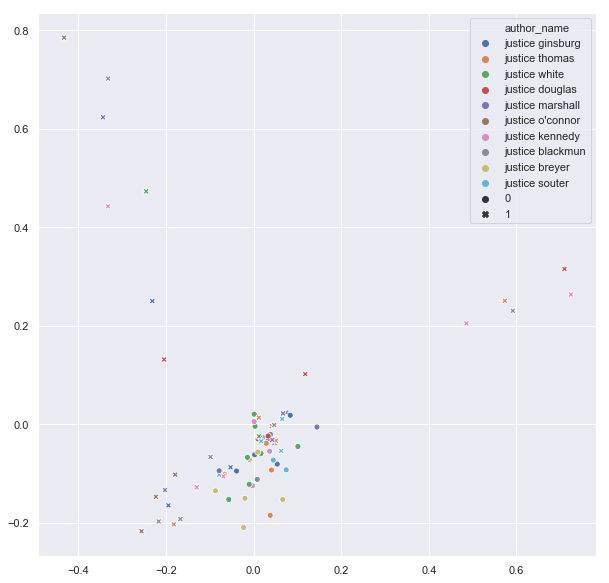

In [31]:
# Run the features through clustering models
from sklearn.cluster import KMeans

X = df_train_lsa.drop(columns=['author_name'])
km_clusters = KMeans(n_clusters=2, random_state=42).fit_predict(X)

# Create 2-dimensional space for clustering visualization
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df_train_lsa['author_name'], 
                style=km_clusters, legend='brief')
plt.show()

In [32]:
print(pd.crosstab(km_clusters, df_train_lsa['author_name']))

author_name  justice blackmun  justice breyer  justice douglas  \
row_0                                                            
0                           2               7                2   
1                           6               0                3   

author_name  justice ginsburg  justice kennedy  justice marshall  \
row_0                                                              
0                           5                3                 2   
1                           3                5                 6   

author_name  justice o'connor  justice souter  justice thomas  justice white  
row_0                                                                         
0                           1               3               3              8  
1                           4               4               6              2  


This seems to put most justices samples fairly equally separated into the two clusters. Basically, there isn't much authorship differentiation here. Let's change the amount of clusters to see if we get more illuminating results

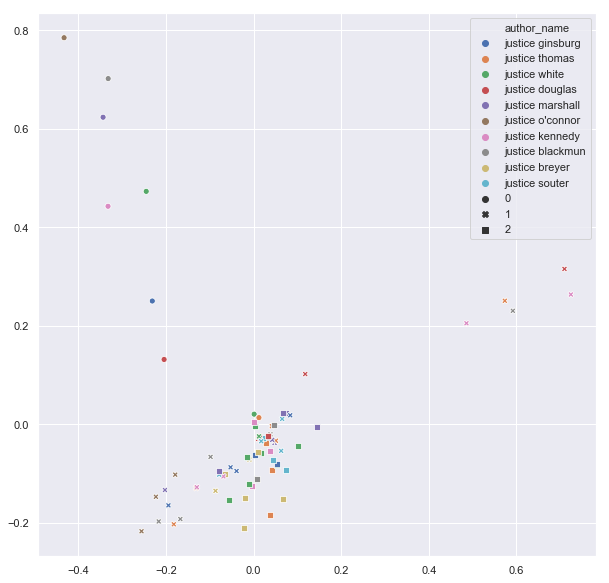

In [33]:
# Run the features through clustering models
from sklearn.cluster import KMeans

X = df_train_lsa.drop(columns=['author_name'])
km_clusters = KMeans(n_clusters=3, random_state=42).fit_predict(X)

# Create 2-dimensional space for clustering visualization
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df_train_lsa['author_name'], 
                style=km_clusters, legend='brief')
plt.show()

In [34]:
print(pd.crosstab(km_clusters, df_train_lsa['author_name']))

author_name  justice blackmun  justice breyer  justice douglas  \
row_0                                                            
0                           1               0                1   
1                           5               2                3   
2                           2               5                1   

author_name  justice ginsburg  justice kennedy  justice marshall  \
row_0                                                              
0                           1                1                 1   
1                           4                4                 3   
2                           3                3                 4   

author_name  justice o'connor  justice souter  justice thomas  justice white  
row_0                                                                         
0                           1               0               1              2  
1                           3               4               5              1  
2           

This seems to be even more meaninglessly divided. I will attempt other methods of clustering to see if there are better results.

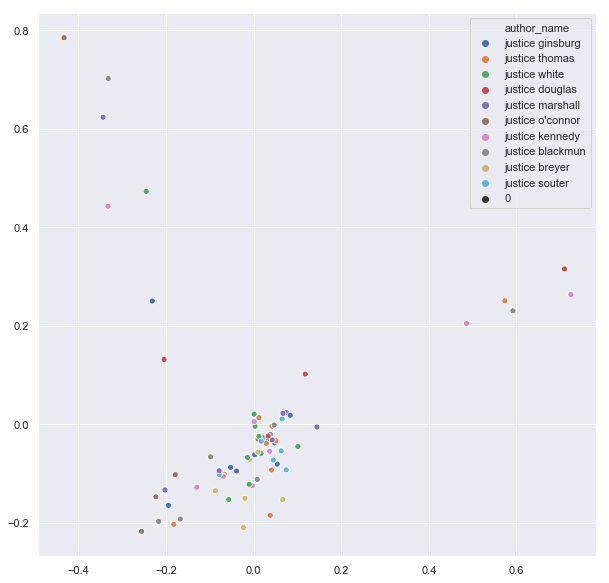

In [35]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = df_train_lsa.drop(columns=['author_name'])
bandwidth = estimate_bandwidth(X)
ms_clusters = MeanShift(bandwidth=bandwidth).fit_predict(X)

# Create 2-dimensional space for clustering visualization
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df_train_lsa['author_name'], 
                style=ms_clusters, legend='brief')
plt.show()

In [36]:
print(pd.crosstab(ms_clusters, df_train_lsa['author_name']))

author_name  justice blackmun  justice breyer  justice douglas  \
row_0                                                            
0                           8               7                5   

author_name  justice ginsburg  justice kennedy  justice marshall  \
row_0                                                              
0                           8                8                 8   

author_name  justice o'connor  justice souter  justice thomas  justice white  
row_0                                                                         
0                           5               7               9             10  


This is a fail, as it only gave one cluster. Not helpful! Let's move on to see how Spectral Clustering does.

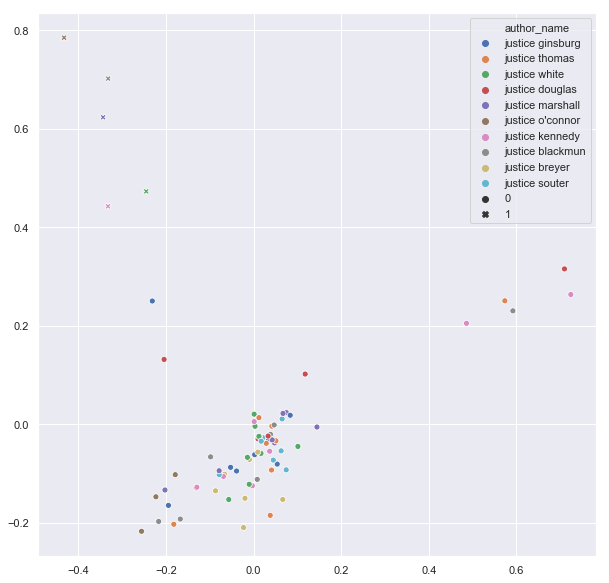

In [37]:
from sklearn.cluster import SpectralClustering

X = df_train_lsa.drop(columns=['author_name'])
sc_clusters = SpectralClustering(n_clusters=2).fit_predict(X)

# Create 2-dimensional space for clustering visualization
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df_train_lsa['author_name'], 
                style=sc_clusters, legend='brief')
plt.show()

In [38]:
print(pd.crosstab(sc_clusters, df_train_lsa['author_name']))

author_name  justice blackmun  justice breyer  justice douglas  \
row_0                                                            
0                           7               7                5   
1                           1               0                0   

author_name  justice ginsburg  justice kennedy  justice marshall  \
row_0                                                              
0                           8                7                 7   
1                           0                1                 1   

author_name  justice o'connor  justice souter  justice thomas  justice white  
row_0                                                                         
0                           4               7               9              9  
1                           1               0               0              1  


Oof. How about spectral with more clusters?

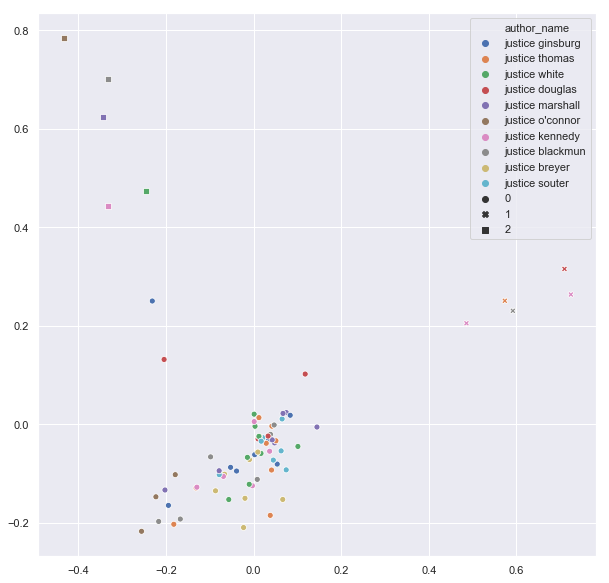

In [39]:
from sklearn.cluster import SpectralClustering

X = df_train_lsa.drop(columns=['author_name'])
sc_clusters = SpectralClustering(n_clusters=3).fit_predict(X)

# Create 2-dimensional space for clustering visualization
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df_train_lsa['author_name'], 
                style=sc_clusters, legend='brief')
plt.show()

In [40]:
print(pd.crosstab(sc_clusters, df_train_lsa['author_name']))

author_name  justice blackmun  justice breyer  justice douglas  \
row_0                                                            
0                           6               7                4   
1                           1               0                1   
2                           1               0                0   

author_name  justice ginsburg  justice kennedy  justice marshall  \
row_0                                                              
0                           8                5                 7   
1                           0                2                 0   
2                           0                1                 1   

author_name  justice o'connor  justice souter  justice thomas  justice white  
row_0                                                                         
0                           4               7               8              9  
1                           0               0               1              0  
2           

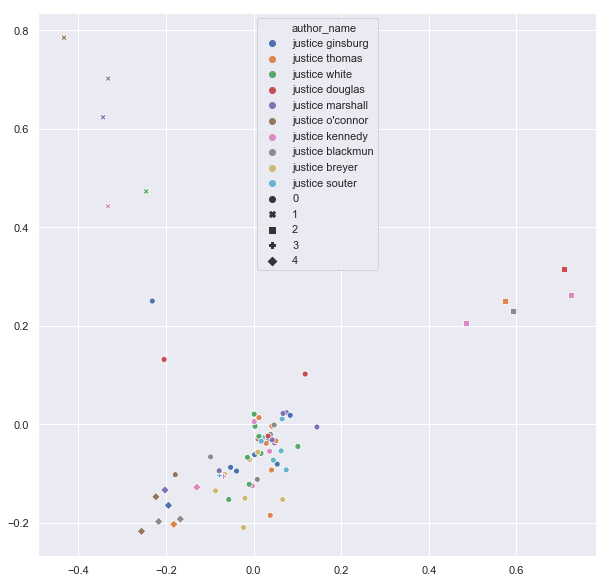

In [41]:
from sklearn.cluster import SpectralClustering

X = df_train_lsa.drop(columns=['author_name'])
sc_clusters = SpectralClustering(n_clusters=5).fit_predict(X)

# Create 2-dimensional space for clustering visualization
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=df_train_lsa['author_name'], 
                style=sc_clusters, legend='brief')
plt.show()

In [42]:
print(pd.crosstab(sc_clusters, df_train_lsa['author_name']))

author_name  justice blackmun  justice breyer  justice douglas  \
row_0                                                            
0                           4               7                4   
1                           1               0                0   
2                           1               0                1   
3                           0               0                0   
4                           2               0                0   

author_name  justice ginsburg  justice kennedy  justice marshall  \
row_0                                                              
0                           7                3                 6   
1                           0                1                 1   
2                           0                2                 0   
3                           0                1                 0   
4                           1                1                 1   

author_name  justice o'connor  justice souter  justice thoma

It seems that clustering is not going to come up with a good way of predicting authorship. I will move on to supervised models that will use the latent semantic analysis features.

# Classification Models

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X = df_train_lsa.drop(columns='author_name')
y = df_train_lsa['author_name']

gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=42)
cross_val_score(gbc, X, y, cv=5)

array([0.        , 0.05555556, 0.1875    , 0.25      , 0.09090909])

In [44]:
gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=2, learning_rate=0.1, random_state=42)

cross_val_score(gbc, X, y, cv=5)

array([0.05555556, 0.05555556, 0.1875    , 0.25      , 0.18181818])

In [45]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42)

cross_val_score(rfc, X, y, cv=5)

array([0.16666667, 0.16666667, 0.1875    , 0.25      , 0.        ])

In [46]:
rfc = RandomForestClassifier(n_estimators=10000, max_depth=2, random_state=42)

cross_val_score(rfc, X, y, cv=5)

array([0.11111111, 0.16666667, 0.25      , 0.16666667, 0.09090909])

In [47]:
lr = LogisticRegression(penalty='l2', solver='lbfgs')

cross_val_score(lr, X, y, cv=5)

array([0.16666667, 0.27777778, 0.0625    , 0.16666667, 0.18181818])

In [48]:
lr = LogisticRegression(penalty='l1', solver='liblinear')

cross_val_score(lr, X, y, cv=5)

array([0.16666667, 0.11111111, 0.1875    , 0.16666667, 0.18181818])

Based on these models, I am going to conclude that authorship is not predictable based on the latent semantic analysis techniques. But is anything else?

# Predicting Category (Majory, Dissent, Concurring)

In [58]:
df_train_lsa['category'] = df_train['category']
df_train_lsa['year_filed'] = df_train['year_filed']
#Remove second dissenting and dissenting distinciton
df_train_lsa = df_train_lsa.replace(to_replace='second_dissenting', value='dissenting')

# Predicting category
X = df_train_lsa.drop(columns=['category', 'year_filed', 'author_name'])
y = df_train_lsa['category']

gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=42)
cross_val_score(gbc, X, y, cv=5)

array([0.46666667, 0.53333333, 0.46666667, 0.53333333, 0.4       ])

In [59]:
gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=2, learning_rate=0.1, random_state=42)

cross_val_score(gbc, X, y, cv=5)

array([0.33333333, 0.4       , 0.4       , 0.4       , 0.53333333])

In [60]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42)

cross_val_score(rfc, X, y, cv=5)

array([0.33333333, 0.53333333, 0.6       , 0.6       , 0.4       ])

In [61]:
rfc = RandomForestClassifier(n_estimators=10000, max_depth=2, random_state=42)

cross_val_score(rfc, X, y, cv=5)

array([0.4       , 0.53333333, 0.46666667, 0.46666667, 0.53333333])

In [62]:
lr = LogisticRegression(penalty='l2', solver='lbfgs')

cross_val_score(lr, X, y, cv=5)

array([0.53333333, 0.46666667, 0.6       , 0.6       , 0.46666667])

In [63]:
lr = LogisticRegression(penalty='l1', solver='liblinear')

cross_val_score(lr, X, y, cv=5)

array([0.46666667, 0.46666667, 0.53333333, 0.53333333, 0.53333333])

# Predicting Year Opinion was Filed

In [64]:
X = df_train_lsa.drop(columns=['category', 'year_filed', 'author_name'])
y = df_train_lsa['year_filed']

gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=42)
cross_val_score(gbc, X, y, cv=5)

array([0.05555556, 0.        , 0.        , 0.        , 0.        ])

In [65]:
gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=2, learning_rate=0.1, random_state=42)

cross_val_score(gbc, X, y, cv=5)

array([0.05555556, 0.        , 0.        , 0.        , 0.        ])

In [66]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42)

cross_val_score(rfc, X, y, cv=5)

array([0.05555556, 0.08333333, 0.1       , 0.25      , 1.        ])

In [67]:
rfc = RandomForestClassifier(n_estimators=10000, max_depth=2, random_state=42)

cross_val_score(rfc, X, y, cv=5)

array([0.02777778, 0.04166667, 0.1       , 0.        , 1.        ])

In [68]:
lr = LogisticRegression(penalty='l2', solver='lbfgs')

cross_val_score(lr, X, y, cv=5)

array([0.02777778, 0.04166667, 0.1       , 0.25      , 1.        ])

In [69]:
lr = LogisticRegression(penalty='l1', solver='liblinear')

cross_val_score(lr, X, y, cv=5)

array([0.02777778, 0.04166667, 0.1       , 0.25      , 0.        ])

# Conclusions

Based on all of the modeling I've done, I conclude that authorship is not predictable using either clustering or traditional supervised learning models on the subset of the opinions I was able to use. None of the clustering methods created clusters that successfully identified authors in any sensical way. The supervised models all performed poorly. 

While these were not successful, I attempted to instead model the year filed and category of opinion. I had some comparative success in modeling the category, which shows there is some lexical difference in an opinion if it is a majority opinion, a concurring opinion, or if it is a dissenting opinion. 

If I had more computing resources, I would like to perform this research on all of the opinions. Would more successful modeling occur if I had the computing power to include all 8000+ opinions in my models? This is something that I would like to attempt in the future.